# Week 1

In [92]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [522]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [523]:
import sys
sys.path.append("../")
import edhec_risk_kit as erk

In [524]:
# using seaborn style (type plt.style.available to see available styles)
plt.style.use("seaborn-dark")

## Factor investing

A **factor** is a variable that influences the **returns of assets**. It represents a **commonality** 
in the returns, i.e., something outside the individual asset, and normally, 
**an exposure to some factor risk** over the long run **yields a reward** (the risk premium).

There are three types of factors:
1. **Macro factors**: industrial growth, inflation,$\dots$
2. **Statistical factors**: something  extracted from the data, which may be or may not be well identified
3. **Style (Intrinsic) factors**: value-growth, momentum, low-volatility$\dots$

For example, some investors consider **Oil prices** to be an important factor in determining equity returns (they are likely to affect stock returns). This would be an example of **macro factor** 
as it is neither a statistical artifact nor is it intrinsic to the stock itself.

### Factor models

A **factor model** simply decompose asset returns $r$ into a set of **factor premia**:
$$
r = \beta_1 f_1 + \beta_2 f_2 + \dots + \beta_n f_n + \alpha + \varepsilon,
$$
where $\{\beta_i\}_{i=1,\dots,n}$ are some real coefficients and 
$\{f_i\}_{i=1,\dots,n}$ are the **factor premia which are** nothing but that **the returns that we get in exchange for exposing ourselves to the factor**. 

In other words, a factor model is **a decomposition of an asset return into a set of returns from other assets**.

### The Capital Asset Pricing Model (CAPM)

The **CAPM** is in some sense an example of factor model. In particular, it is used to determine a theoretically appropriate return of an asset to make decisions about adding this asset 
to a well-diversified portfolio.

The model takes into account the asset's sensitivity to non-diversifiable risk (also known as systematic risk or market risk), often represented by the quantity beta (β) in the financial industry, as well as the expected return of the market and the expected return of a theoretical risk-free asset. 

The model can be used for pricing an individual security. The model defines a 
**Security Market Line (SML)** which enables us to compute the reward-to-risk ratio for a security in relation to that of the **overall market**:
$$
\text{SML}: \;\mathbb{E}[r_i] = \beta_i(\mathbb{E}[r_m] - r_f) + r_f, 
$$
which means that the **excess return** of the asset $i$ is given by the **excess return of the market** 
(here, **$r_m$ is the return of the market** and $r_f$ is the risk-free rate) 
times a coefficient $\beta_i$ defined as:
$$
\mathbb{E}[r_i] - r_f = \beta_i(\mathbb{E}[r_m] - r_f), 
\qquad  
\beta_i := \frac{\text{Cov}(r_i,r_m)}{\text{Var}(r_m)}, 
$$
which is the **sensitivity of the asset with respect to the market**.

Note that if $\beta_i$ is large, it means that the asset $i$ is higly correlated with the market, i.e., if the market goes up and so goes up the asset (and, of course, if the market goes down, then the asset goes down). On the other hand, if $\beta_i$ is very small, it means that the stock is almost uncorrelated with respect to the market, hence changes in the market do not affect the returns of the asset.

In addition, note that **the expected market return** is usually estimated by measuring **the arithmetic average of the historical returns of market components**.

By definition of factor model, **the CAPM is a one-factor model** since the excess return of the security depends **only** ont the excess return of the market. Also look at the **capital market line (CML)** we have described in the week 1 of the first course.

#### Price-to-book (P/B) ratio (or Market-to-book ratio)

In accounting, the **book value is the value of an asset according to its balance sheet account balance**. 
For assets, the value is based on **the original cost of the asset less any depreciation, amortization or impairment costs** 
made against the asset. Traditionally, a company's book value is its total assets minus intangible assets and liabilities.

The **price-to-book (P/B) ratio**, is used to compare a company's current market price to its book value. 
The calculation can be performed in two ways. One, in which the company's market capitalization is 
divided by the company's total book value from its balance sheet. A second way is to divide the company's current share price 
by the book value per share (i.e. its book value divided by the number of outstanding shares).

Such ratio is also called **market-to-book ratio**.

#### Value stocks and Growth stocks

Note that the inverse of the P/B ratio, is therefore called the **book-to-price (B/P)** (or **book-to-market**) **ratio**. 

Assets (e.g., stocks) with high **book-to-market** ratios are called **Value stocks**. If this ratio is high, it then means that the book value is much larger than the current market price, and this indicates that this asset is somehow cheap with respect to its true value (it is **undervalued** by the market).

On the other hand, assets with low **book-to-market** ratios are called **Growth stocks**. In this case, it then means that the book value is much samller than the current market price which indicates that the asset is somehow **overvalued** by the market. The reason why they may be overvalued is because they are associated with high-quality, successful companies whose earnings are expected to continue 
growing at an above-average rate relative to the market and then growth stock investors may be willing to pay more to own shares. 
Analysts tend to classify a stock as Growht Stock if its **ROE** (**Return on equity**: company's net income divide by average common equity) is larger than or equal to $15\%$.

### Fama-French Model

The **Fama-French model** is a **three-factor** model which enhance the CAPM (one-factor model). The three factors are:
- the market risk (i.e., as in the CAPM),
- the outperformance of **small versus big** companies,
- the outperformance of **high book/market versus small book/market** companies.

What Fama and French did was to take the entire universe of stocks an put them into ten buckets (**deciles**). They sorted such deciles in two ways. 

A first sorting was done according to the **size**, i.e., the **market capitalization**, 
and then they compared the performance of the bottom $10\%$ companies versus the top $10\%$ companies according to the size.

The second sorting was done according to the **book-to-market ratios** (B/P ratio), and then they did the same, i.e., they looked at 
the performance of the bottom $10\%$ companies (Growth Stocks) versus the top $10\%$ companies (Value Stocks). 

Fama and French observed that the classes of stocks that have tended to do better than the market as a whole have been 
(i) the **small caps** (bottom decile w.r.t sizes) and (ii) the **Value Stocks** (top decile w.r.t. B/P ratios). 

Hence, they introduced the **size factor** and the **value factor** in addition to the **market factor** 
of simple CAPM and enhance the model ($1993$): 
$$
\mathbb{E}[r_i] - r_f = 
\beta_{i,\text{MKT}}\mathbb{E}[r_m - r_f] + \beta_{i,\text{SMB}}\mathbb{E}[\text{SMB}] + \beta_{i,\text{HMS}}\mathbb{E}[\text{HMS}]  
$$
where:
- $\beta_{i,\text{MKT}}$ is the same $\beta$ of the CAPM (we stress the dependence on the **market**), 
- $\text{SMB}$ means **Small (size) Minus Big (size)** stocks, 
- $\text{HML}$ means **High (B/P ratio) Minus Low (B/P ratio)** stocks.

There could be in principle more factors to add. 
For example, the **Carhart four-factor model** enhance the Fama-French model by adding the **Momentum factor**. The **Momentum** 
in a stock is the tendency for the stock price to continue rising if it is going up and to continue declining if it is going down. It can be computed by subtracting the equal weighted average of the lowest performing firms from the equal weighted average of the highest 
performing firms, lagged one month.

### Factor benchmark

Any factor model can be re-interpreted as a benchmark. 
For example, consider the case of single CAMP model. We can rewrite it in the following way:
$$
\mathbb{E}[r_i - r_f] = \beta\, \mathbb{E}[r_m - r_f] + \alpha
\quad\Longrightarrow\quad
\mathbb{E}[r_i] = \beta\, \mathbb{E}[r_m] - (\beta-1) \mathbb{E}[r_f]   + \alpha.
$$
This means that if I have $1$ dollar I can **borrow $\beta-1$ dollars** and **invest $\beta$ dollars in the market**. 
For instance, let $\beta=1.3$. It means that we borrow $\beta-1=0.3$ cents and then we put $1.3$ dollars in the market.
We can always do this and we would get some return (equal to $1.3\,\mathbb{E}[r_m] - 0.3\,\mathbb{E}[r_f]$).

Now, if we see that there is some asset in the market that have a return higher than what we got, 
then it means that it is the **value added by the manager**, i.e., the manager of that assets did particularly well.

In other words, we have this model and some manager (i.e., we have some asset $i$), **we do the regression** by finding $\beta$ 
**and we look for alpha**. **If we do not get any alpha**, it means that **this asset is not going to adding any value to us**, 
just because we could get the same return without this asset (by doing the short-long trick above).
In particular, if we found a positive $\alpha$ that manager (asset) gives some values to us. If $\alpha$ is negative, we should avoid investing in that asset as it destroys value.

In this sense we say that, in this case, the **factor benchmarck is a short position of $\beta-1$ dollars in cash (T-bills)** and a 
**leveraged position of $\beta$ dollars in the market portfolio**. 

### Style analysis

The **Returns-based style** (or simply **style**) analysis was introduced by W. Sharpe (which also contributes to the CAPM). 
It can be regarded as a **constrained form of factor model**, 
and it has been applied to the analysis of the performance of active managers.

Basically, Sharpe tooks what looked like a factor model without effectively using factors but some kind of **explanatory variables** (i.e., 
he simply rewrote the model as we have done above):
$$
r_t^m = \sum_{i=1}^{N} \beta_i r_t^i + \alpha + \varepsilon, 
$$
where $r_t^m$ is the historical returns of the manager (the asset) we are considering, $\{r_{t}^{i}\}$ 
is a set of returns of some indices (they are our explanatory variables), and $\alpha$ is what is supposed to 
be **the manager added value**. 
In this kind of analysis the coefficients $\beta$ represent the 
**exposures to the chosen types of market returns** and they 
are constrained to sum to $1$. This way, they represent portfolio weights in the explanatory variables:
$$
\sum_{i=1}^N \beta_i = 1.
$$

## Factor Analysis of Warren Buffet Berkshire Hathaway

Let us load the returns of the Berkshire Hathaway holding company. Notice that the dataset contains daily returns. Here, we compound 
daily returns over months and load the monthly returns. Data are available from 1990-01 up to 2018-12.

In [13]:
brka_rets = erk.get_brka_rets(monthly=True)
brka_rets.head()

,BRKA
DATE,
1990-01,-0.140634
1990-02,-0.030852
1990-03,-0.069204
1990-04,-0.003717
1990-05,0.067164


Now, we load the **factors** (the explanatory variables) composing the Fama-French model:

In [14]:
fff = erk.get_fff_returns()
fff.head()

,Mkt-RF,SMB,HML,RF
1926-07,0.0296,-0.0230,-0.0287,0.0022
1926-08,0.0264,-0.0140,0.0419,0.0025
1926-09,0.0036,-0.0132,0.0001,0.0023
1926-10,-0.0324,0.0004,0.0051,0.0032
1926-11,0.0253,-0.0020,-0.0035,0.0031


The columns are the **market return minus the risk-free rate**, 
the **Small Minus Big** (the **Size**), 
the **High Minus Low** (the **Value**), and the pure risk-free rate (I think this is the return of T-Bills or something like that).  

Next, consider a common time period, say from **1990-01 to 2015-05**. 

Firstly, we do a factor analysis using the **CAPM model**. 
That is, we want to decompose the observed return of the Berkshire Hathaway into a portion which is due to the market 
and the rest which is not due to the market:
$$
R_{\text{brka}, t} - R_{f,t} = \beta(R_{mkt, t} - R_{f,t}) + \alpha + \varepsilon_t.
$$

In [15]:
# compute the excess return of Berkshire Hathaway 
brka_excess_rets = brka_rets["1990":"2015-05"] - fff.loc["1990":"2015-05"][["RF"]].values

# save the excess return of the market 
mkt_excess_rets  = fff.loc["1990":"2015-05"][["Mkt-RF"]]

In [16]:
factors = mkt_excess_rets.copy()
# the OLS methods assume a bias equal to 0, hence a specific variable for the bias has to be given 
factors["alpha"] = 1

lm = sm.OLS(brka_excess_rets, factors).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   BRKA   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     59.05
Date:                Tue, 26 Nov 2019   Prob (F-statistic):           2.15e-13
Time:                        10:21:10   Log-Likelihood:                 454.77
No. Observations:                 305   AIC:                            -905.5
Df Residuals:                     303   BIC:                            -898.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.5554      0.072      7.685      0.000       0.413       0.698
alpha          0.0063      0.003      2.005      0.046       0.000       0.013
==============================================================================
Omnibus:                       54.924   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.859
Skew:                           0.840   Prob(JB):                     1.57e-31
Kurtosis:                       5.888   Cond. No.                         23.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficients of the regression are:

In [17]:
lm.params

Mkt-RF    0.555427
alpha     0.006340
dtype: float64

that is we have a $\beta$ of about 0.55 and $\alpha$ of about $0.006$. This means that the CAPM benchmark consists of about $0.46$ dollars in Treasury bills and about $0.55$ dollars in the market, i.e., **each dollar in the Berkshire Hathaway portfolio is equivalent $46$ cents in Treasury bills and $55$ cents in the market**. Relative to this, **the company is adding (i.e., it has a $\alpha$ of) $0.6\%$ per month** (although the degree of statistical significance is not very high).

Let us now use the complete **Fama-French model**. We add the rest of factors:

In [19]:
factors = mkt_excess_rets.copy()
factors["Size"]  = fff.loc["1990":"2015-05"][["SMB"]]
factors["Value"] = fff.loc["1990":"2015-05"][["HML"]]
factors["alpha"] = 1

In [20]:
lm_ff = sm.OLS(brka_excess_rets, factors).fit()
lm_ff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   BRKA   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     42.52
Date:                Tue, 26 Nov 2019   Prob (F-statistic):           6.12e-23
Time:                        10:21:30   Log-Likelihood:                 481.50
No. Observations:                 305   AIC:                            -955.0
Df Residuals:                     301   BIC:                            -940.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.6877      0.069     10.013      0.000       0.553       0.823
Size          -0.4889      0.094     -5.202      0.000      -0.674      -0.304
Value          0.3921      0.101      3.887      0.000       0.194       0.591
alpha          0.0054      0.003      1.853      0.065      -0.000       0.011
==============================================================================
Omnibus:                       51.981   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.007
Skew:                           0.929   Prob(JB):                     2.34e-21
Kurtosis:                       5.005   Cond. No.                         38.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With Fama-French model, we have that $\alpha$ has fallen from $0.63\%$ to about $0.54\%$ per month. 
The loading on the market has moved up from about $0.55$ to $0.68$, which means that adding these new explanatory factors did, effectively, 
change things. 

We can interpret the loadings on Value being positive (i.e., the **positive beta coefficient of HML**) 
as saying that **Berkshire Hathaway has a significant Value tilt** - which should not be a shock to anyone that follows Buffet. 
Additionally, the negative tilt on Size (i.e., **negative beta coefficient of SMB**) 
suggests that **Berkshire Hathaway tends to invest in large companies rather than small companies**.

In other words, **Berkshire Hathaway appears to be a Large Value investor**. 
Of course, we may already know this if we were following the company.

The new way to interpret each dollar invested in Berkshire Hathaway is: 
- about **$68$ cents in the market and about $32$ cents in T-Bills**; 
- about **$39$ cents in Value stocks and short $38$ cents in Growth stocks**; 
- short **$48$ cents in SmallCap stocks and long $50$ cents in LargeCap stocks**. 

Finally, if we were to do all of this, we would still end up underperforming Berkshire Hathaway by about $0.54\%$ (**54 basis points**) per month.

Note that we have the **erk.linear_regression(dep_var, expl_vars, alpha=True)** method in the kit to make a linear regression.

## Sharpe Style Analysis

Now we perform the Sharpe style analysis. Recall that in this case we have a constraint on the coefficients $\beta$ which are all positives and sum to 1. In this way, the coefficients of the observed return of a manager can be interpreted as **weights in a portfolio of building blocks which together mimic the return series**. The exercise can reveal drifts in a manager's style as well as provide insight into what the manager is likely doing to obtain the returns.

To run the Sharpe Style analysis we will use a **quadratic optimizer** to find the weights that minimizes the square of the difference between the observed series and the returns of a benchmark portfolio that holds the explanatory building blocks in those same weights. 
That is, **we minimize the tracking error between the two return series**:
$$
\begin{cases} 
\text{minimize} \; &E(\beta_i)  \\
&\sum_{i=1}^N \beta_i = 1,
\end{cases}
$$
where the **tracking error** is given by:
$$
E(\beta_i) := \sqrt{ \sum_{t}\left( r_t^m - \sum_{i=1}^{N} \beta_i r_t^i \right)^2 }.
$$
First of all, we use the industry returns:

In [156]:
ind_rets = erk.get_ind_returns()["2000":]
ind_rets.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
2000-01,-0.0829,-0.0228,-0.0862,0.0229,-0.0092,-0.0651,-0.1138,0.0756,-0.0933,-0.0764,...,-0.0404,-0.0973,-0.0064,-0.0878,-0.0959,0.0899,-0.1453,-0.0739,-0.0442,-0.0412
2000-02,-0.0689,-0.1164,-0.0401,-0.0177,-0.0071,-0.1157,-0.1278,-0.0288,-0.0729,-0.0584,...,-0.0359,0.0759,0.2509,-0.1142,-0.0535,0.0113,-0.0393,-0.1203,-0.0849,-0.0061
2000-03,0.0969,0.0013,0.0511,0.1052,0.1293,-0.1426,0.2506,0.0028,0.1217,0.0535,...,0.0757,0.0269,0.0456,0.0836,0.1287,0.0659,0.1436,0.1598,0.1669,-0.0016
2000-04,-0.0390,0.0368,0.0379,0.0220,-0.0734,0.0429,0.0430,0.0525,-0.0373,0.0648,...,-0.0790,-0.1655,-0.0630,-0.0109,0.0348,-0.0107,-0.0560,0.0382,-0.0425,0.0819
2000-05,0.1565,0.1187,0.1951,0.0119,-0.0593,0.0279,-0.0504,0.0394,-0.0010,-0.0328,...,-0.1041,-0.0892,-0.1165,-0.0137,-0.0363,0.0193,-0.0304,-0.0421,0.0506,0.0531


We now construct **an artificial manager return** (i.e. the reuturn of a stock). 
Suppose that he invests in $30\%$ Beer, $50\%$ in Smoke, and $20\%$ in 
other things that have an average return of $0\%$ and an annualized volatility of $15\%$:

In [144]:
mgr_rets = 0.3*ind_rets["Beer"] + 0.5*ind_rets["Smoke"] + 0.2*np.random.normal(loc=0.0, scale=0.15/np.sqrt(12), size=ind_rets.shape[0])
mgr_rets.head()

2000-01   -0.046039
2000-02   -0.064663
2000-03    0.028972
2000-04    0.027679
2000-05    0.128420
Freq: M, dtype: float64

Now, **assume we knew absolutely nothing about this manager** and all we observed was the returns. **How could we tell what she was invested in?** We could run the style analysis in which we try to decompose the return of the manager into a weigthed portfolio of stocks in the industry:

In [145]:
weights = erk.style_analysis(mgr_rets, ind_rets)

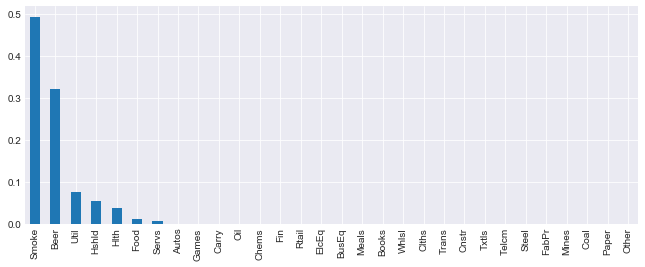

In [146]:
weights.sort_values(ascending=False).plot.bar(grid=True, figsize=(11,4))
plt.show()

We can see that we got about $50\%$ in Smoke and $35\%$ in Beer, which is pretty accurate, plus other investments in industries 
that eventually we know that are not true (since we artificially invented the manager returns).  

We could in pricnciple run a **linear regression** as well:

In [147]:
betas = erk.linear_regression(mgr_rets, ind_rets).params

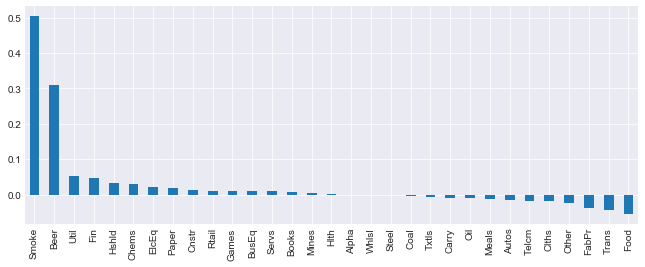

In [148]:
betas.sort_values(ascending=False).plot.bar(grid=True, figsize=(11,4))
plt.show()

Note that now we obtain negative indices (since in the regression problem we do not impose any constraint). We see that we still obtain a pretty accurate description of the right investments (Smoke and Beer) and a bunch of many other stuff. 
However, in this case, **negative coefficients are hard to intepret and in real-life data, those will be much larger**.

#### Warning: Potential Misuse of Style Analysis

Style Analysis works best when the explanatory indices are in fact a good specification of what is happening. For instance, it usually gives you very useful and revealing insight if we use a stock market index (such as **SPY**) and other broad indices, ETFs or mutual funds (such as a Value Fund, a Growth Fund, an International Fund, a Bond Fund etc).

Part of the skill in extracting meaningful results is to **pick the right set of explanatory variables**.
On the other hand, **a style analysis will always return a portfolio**, however unreasonable it might be, and, moreover, 
it is not always obvious **how much we can rely on the results we get**.

Let us extract the major industries **Buffer invested in since 2000 as follows**:

In [138]:
brka_rets = erk.get_brka_rets(monthly=True)["2000":]

In [139]:
weights = erk.style_analysis(brka_rets, ind_rets["2000":])  

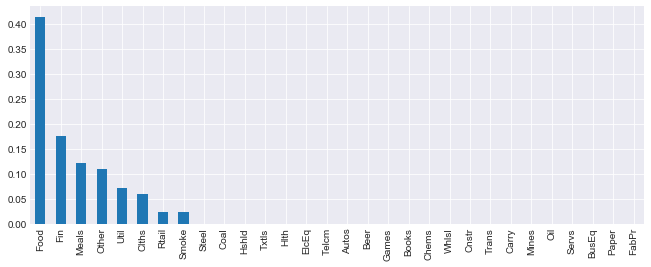

In [140]:
weights.sort_values(ascending=False).plot.bar(grid=True, figsize=(11,4))
plt.show()

If we pick returns from 2009:

In [141]:
weights = erk.style_analysis(brka_rets["2009":], ind_rets["2009":])  

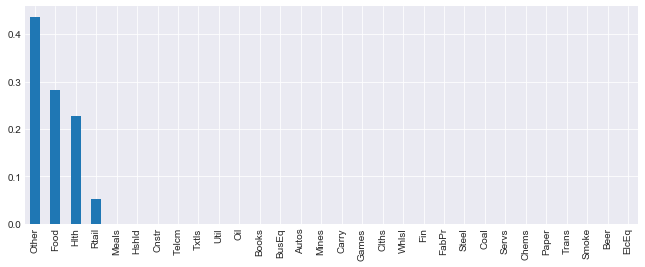

In [142]:
weights.sort_values(ascending=False).plot.bar(grid=True, figsize=(11,4))
plt.show()

Should we believe the analysis? Probably not. However, when the specification is in fact accurate (as we saw in the articially generated series) the results can be very revealing.

#### Style Drift: Time Varying Exposures using Style Anaylsis
One of the most common ways in which Sharpe Style Analysis can be used is to measure style drift. 
If we run the style analysis function over a rolling window of 1 to 5 years, you can extract changes in the style exposures of a manager.

As an exercise to the student, download a set of returns from Yahoo Finance, and try and measure the style drift in your favorite fund manager. Use reliable Value and Growth ETFs such as "SPYG" and "SPYV" along with a SmallCap ETF such as "SLY" and LargeCap ETF such as "OEF".

Alternately, the Fama-French research factors and use the Top and Bottom portfolios by Value (HML) and Size (SMB) to categorize mutual funds into categories. This is very similar to the "Style Box" methodology employed by Morningstar and displayed on their website. Compare your results with their results to see if they agree!

## Comparing Equally Weigthed (EW) and Cap-Weighted (CW) Portfolios

Let us load the **Equally-Weigthed (EW)** and the **Value-Weighted (VW)** 
versions of the returns of the industry portfolios:

In [507]:
ind_rets_cw = erk.get_ind_file(filetype="rets", nind=30, ew=False)
ind_rets_ew = erk.get_ind_file(filetype="rets", nind=30, ew=True)

Notice that here **Value-Weigthed does not regard Value Stocks**, it simply means weigthing by market capitalization as opposite as equally weigthing.

Let us compute the sharpe ratios of these portfolio across each industry and compare them:

In [508]:
risk_free_rate = 0.03
sr = pd.DataFrame({
    "CW": erk.sharpe_ratio(ind_rets_cw["1945":], risk_free_rate, 12), 
    "EW": erk.sharpe_ratio(ind_rets_ew["1945":], risk_free_rate, 12)
})

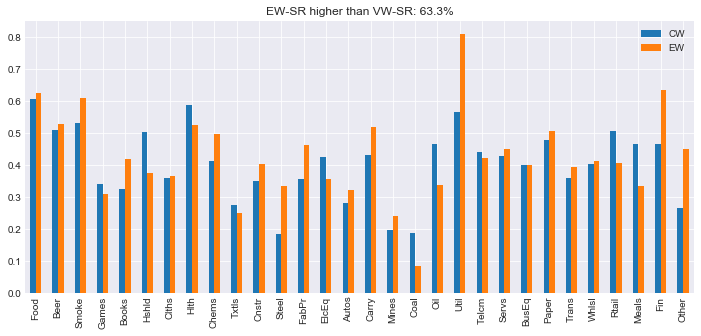

In [509]:
# percentage of times the EW sharpe ratio was higher than the VW sharpe ratio
pew_er = (sr["EW"] > sr["CW"]).sum()/sr.shape[0] * 100

ax = sr.plot.bar(grid=True, figsize=(12,5))
ax.set_title("EW-SR higher than VW-SR: {:.1f}%".format(pew_er))
plt.show()

In [514]:
nind = 49

In [525]:
ind_rets = erk.get_ind_file(filetype="rets", nind=nind)["1974":]
ind_mcap = erk.get_ind_market_caps(nind=nind, weights=True)["1974":]
ind_mcap.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
1974-01,0.000757,0.023874,0.014288,0.006235,0.008435,0.004557,0.002918,0.006314,0.087971,0.003453,...,0.016800,0.014330,0.005279,0.046936,0.006213,0.031837,0.020093,0.001807,0.040329,0.044887
1974-02,0.000773,0.025248,0.013489,0.006172,0.008666,0.004958,0.003160,0.006053,0.085401,0.003770,...,0.016839,0.014344,0.005555,0.050377,0.006280,0.031768,0.019675,0.002004,0.040422,0.045171
1974-03,0.000883,0.025604,0.013220,0.006077,0.008796,0.004838,0.003161,0.005738,0.082550,0.003859,...,0.017098,0.015476,0.005700,0.051104,0.006005,0.032384,0.019254,0.001954,0.040982,0.044799
1974-04,0.000891,0.025714,0.012954,0.006074,0.008467,0.005081,0.003358,0.006207,0.084434,0.003871,...,0.017267,0.015057,0.005921,0.049980,0.006376,0.031559,0.018815,0.001956,0.040202,0.044434
1974-05,0.000846,0.026251,0.013041,0.006144,0.008643,0.004822,0.003241,0.006097,0.084895,0.003852,...,0.017598,0.015178,0.006092,0.051341,0.006481,0.031371,0.017868,0.001795,0.039215,0.044104


Note that the **weights=True** in the **erk.get_ind_market_caps** method means that the method return the single industries market cap-weigths as a percentage of the total market capitalization (look inside the method).

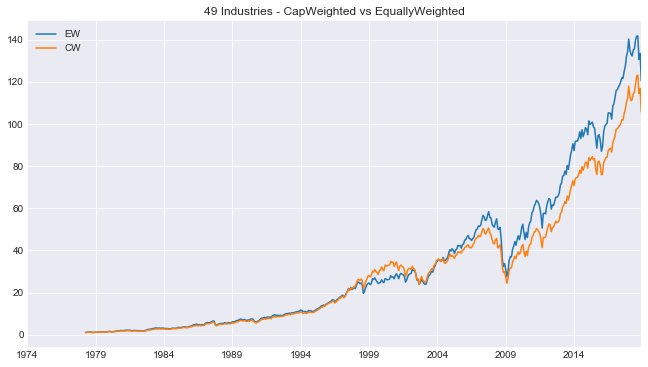

In [526]:
window  = 52
ew_rets = erk.backtest_weight_scheme(ind_rets, window=window, weight_scheme=erk.weight_ew)
cw_rets = erk.backtest_weight_scheme(ind_rets, window=window, weight_scheme=erk.weight_cw, cap_ws=ind_mcap)

bt_rets   = pd.DataFrame({"EW": ew_rets, "CW": cw_rets})
bt_growth = (1 + bt_rets).cumprod()
bt_growth.plot(grid=True, figsize=(11,6), title="{} Industries - CapWeighted vs EquallyWeighted".format(nind))
plt.show()

In [527]:
erk.summary_stats( bt_rets.dropna() )

,Ann. return,Ann. vol,Sharpe ratio,Skewness,Kurtosis,Historic CVar,C-F Var,Max Drawdown
EW,0.124764,0.162239,0.568314,-0.789831,6.575372,0.105574,0.072574,-0.528292
CW,0.121158,0.149160,0.594657,-0.738559,5.599102,0.096448,0.066572,-0.516615


#### Improving EW schemes with CapWeight Tethering

Although very popular, often in practice, purely equally weigthed portfolios are not used 
as such portofolios are constrained in some way, 
for instance, to match the sector weights of the cap-weighted benchmark or to make sure that **microcap stocks are not overweighted**. The motivation for doing so could be to make a portfolio **more tradeable (e.g. some microcaps may not have the liquidity**) or to **improve the tracking error to the Cap-Weighted index**.

We can then **modify the equally weigthed scheme** in order to:
- drop microcap stocks beyond a given threshold, 
- impose a constraint that ensures that the maximum weight assigned to any stock is no more than some multiple of the weight it would be in a cap-weighted portfolio.

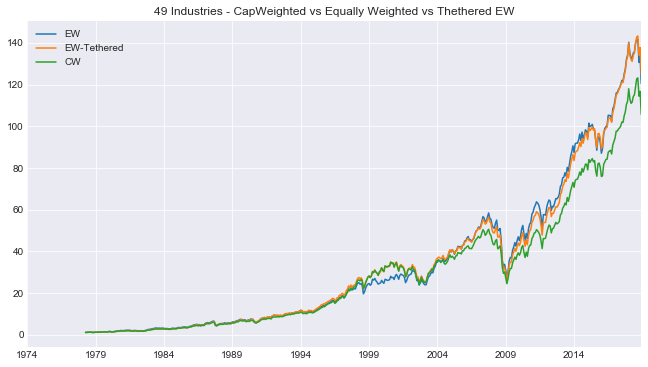

In [528]:
window = 52
ew_rets    = erk.backtest_weight_scheme(ind49_rets, window=window, weight_scheme=erk.weight_ew)
ew_tr_rest = erk.backtest_weight_scheme(ind49_rets, window=window, weight_scheme=erk.weight_ew, cap_ws=ind49_mcap, max_cw_mult=5, microcap_thr=0.005)
cw_rets    = erk.backtest_weight_scheme(ind49_rets, window=window, weight_scheme=erk.weight_cw, cap_ws=ind49_mcap)

bt_rets    = pd.DataFrame({"EW": ew_rets, "EW-Tethered": ew_tr_rest, "CW": cw_rets})
bt_growth = (1 + bt_rets).cumprod()
bt_growth.plot(grid=True, figsize=(11,6), title="49 Industries - CapWeighted vs Equally Weighted vs Thethered EW")
plt.show()

In [529]:
erk.summary_stats( bt_rets.dropna() )

,Ann. return,Ann. vol,Sharpe ratio,Skewness,Kurtosis,Historic CVar,C-F Var,Max Drawdown
EW,0.124764,0.162239,0.568314,-0.789831,6.575372,0.105574,0.072574,-0.528292
EW-Tethered,0.125691,0.157930,0.589551,-0.775741,6.180246,0.101859,0.070546,-0.531739
CW,0.121158,0.149160,0.594657,-0.738559,5.599102,0.096448,0.066572,-0.516615
